In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('mushroom.csv')
data=pd.DataFrame(data=data)
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [5]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [6]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [9]:
data.shape

(8124, 23)

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])
 
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [11]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


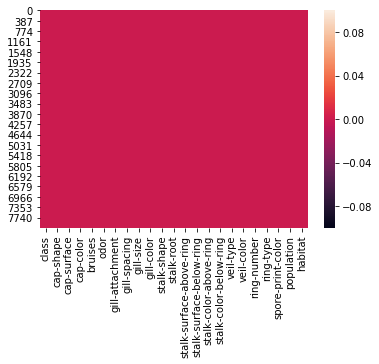

In [12]:
sns.heatmap(data.isnull())

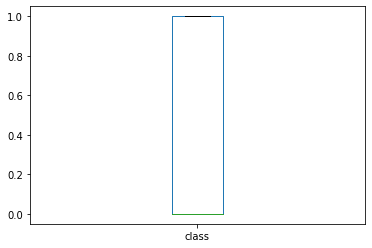

In [14]:
data['class'].plot.box()

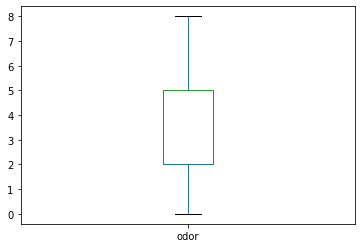

In [15]:
data['odor'].plot.box()

In [16]:
x = data.iloc[:,1:23]
y = data.iloc[:, 0]

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [19]:
x.shape

(8124, 22)

In [20]:
y.shape

(8124,)

In [21]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=4)

In [22]:
train_x.shape

(6499, 22)

In [23]:
test_x.shape

(1625, 22)

In [24]:
train_y.shape

(6499,)

In [25]:
test_y.shape

(1625,)

In [26]:
lg=LogisticRegression()

In [27]:
lg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
pred=lg.predict(test_x)
print(pred)

[0 1 1 ... 1 1 0]


In [29]:
print("accuracy score:",accuracy_score(pred,test_y))

accuracy score: 0.9581538461538461


In [30]:
print(confusion_matrix(test_y,pred))

[[814  31]
 [ 37 743]]


In [31]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       845
           1       0.96      0.95      0.96       780

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



In [32]:
gnb=GaussianNB()
gnb.fit(train_x,train_y)
predgnb=gnb.predict(test_x)
print(accuracy_score(test_y,predgnb))
print(confusion_matrix(test_y,predgnb))
print(classification_report(test_y,predgnb))

0.9316923076923077
[[786  59]
 [ 52 728]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       845
           1       0.93      0.93      0.93       780

    accuracy                           0.93      1625
   macro avg       0.93      0.93      0.93      1625
weighted avg       0.93      0.93      0.93      1625



In [33]:
svc=SVC(kernel='rbf')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predgnb))
print(confusion_matrix(test_y,predgnb))
print(classification_report(test_y,predgnb))

0.9316923076923077
[[786  59]
 [ 52 728]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       845
           1       0.93      0.93      0.93       780

    accuracy                           0.93      1625
   macro avg       0.93      0.93      0.93      1625
weighted avg       0.93      0.93      0.93      1625



In [34]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
print(accuracy_score(test_y,preddtc))
print(confusion_matrix(test_y,preddtc))
print(classification_report(test_y,preddtc))

1.0
[[845   0]
 [  0 780]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [35]:
dtc=KNeighborsClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
print(accuracy_score(test_y,preddtc))
print(confusion_matrix(test_y,preddtc))
print(classification_report(test_y,preddtc))

1.0
[[845   0]
 [  0 780]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [36]:
y_pred_prob=lg.predict_proba(test_x)[:,1]
y_pred_prob

array([5.54205785e-02, 7.91866857e-01, 9.99482902e-01, ...,
       9.48483976e-01, 9.55715139e-01, 1.22427556e-06])

In [37]:
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)

In [38]:
fpr

array([0.        , 0.        , 0.        , 0.00236686, 0.00236686,
       0.0035503 , 0.0035503 , 0.00473373, 0.00473373, 0.00591716,
       0.00591716, 0.00710059, 0.00710059, 0.01065089, 0.01065089,
       0.01183432, 0.01183432, 0.01301775, 0.01301775, 0.01420118,
       0.01420118, 0.01775148, 0.01775148, 0.01893491, 0.01893491,
       0.02130178, 0.02130178, 0.02366864, 0.02366864, 0.02485207,
       0.02485207, 0.02721893, 0.02721893, 0.02840237, 0.02840237,
       0.03076923, 0.03076923, 0.03313609, 0.03313609, 0.03431953,
       0.03431953, 0.03550296, 0.03550296, 0.03668639, 0.03668639,
       0.03786982, 0.03786982, 0.04023669, 0.04023669, 0.04142012,
       0.04142012, 0.04260355, 0.04260355, 0.04378698, 0.04378698,
       0.04970414, 0.04970414, 0.05088757, 0.05088757, 0.06035503,
       0.06035503, 0.06863905, 0.06863905, 0.07218935, 0.07218935,
       0.07455621, 0.07455621, 0.08284024, 0.08284024, 0.10059172,
       0.10059172, 0.12071006, 0.12071006, 1.        ])

In [39]:
tpr

array([0.        , 0.00128205, 0.3025641 , 0.3025641 , 0.30769231,
       0.30769231, 0.31282051, 0.31282051, 0.34615385, 0.34615385,
       0.36923077, 0.36923077, 0.38076923, 0.38076923, 0.80897436,
       0.80897436, 0.89487179, 0.89487179, 0.89871795, 0.89871795,
       0.90641026, 0.90641026, 0.91538462, 0.91538462, 0.92307692,
       0.92307692, 0.92692308, 0.92692308, 0.93589744, 0.93589744,
       0.93717949, 0.93717949, 0.93846154, 0.93846154, 0.94230769,
       0.94230769, 0.9474359 , 0.9474359 , 0.94871795, 0.94871795,
       0.95128205, 0.95128205, 0.9525641 , 0.9525641 , 0.95641026,
       0.95641026, 0.96025641, 0.96025641, 0.96410256, 0.96410256,
       0.96923077, 0.96923077, 0.97435897, 0.97435897, 0.97948718,
       0.97948718, 0.98461538, 0.98461538, 0.98974359, 0.98974359,
       0.99102564, 0.99102564, 0.99230769, 0.99230769, 0.99487179,
       0.99487179, 0.99615385, 0.99615385, 0.9974359 , 0.9974359 ,
       0.99871795, 0.99871795, 1.        , 1.        ])

In [40]:
thresholds

array([1.99999994e+00, 9.99999940e-01, 9.99921695e-01, 9.99711847e-01,
       9.99539210e-01, 9.99525018e-01, 9.99507456e-01, 9.99486088e-01,
       9.99323633e-01, 9.99322540e-01, 9.99096524e-01, 9.99087037e-01,
       9.98907632e-01, 9.98476160e-01, 9.00529732e-01, 9.00211604e-01,
       7.88999721e-01, 7.85619697e-01, 7.63905103e-01, 7.63357210e-01,
       7.52443417e-01, 7.40703966e-01, 7.02054961e-01, 7.00425425e-01,
       6.82651521e-01, 6.76357876e-01, 6.64209327e-01, 6.62003371e-01,
       6.27275921e-01, 6.23431892e-01, 6.21083596e-01, 6.15809619e-01,
       6.15619697e-01, 6.11575124e-01, 6.02763324e-01, 5.94558179e-01,
       5.55632089e-01, 5.45475507e-01, 5.30011711e-01, 5.29098051e-01,
       5.21137667e-01, 5.13283060e-01, 5.01240622e-01, 5.01103073e-01,
       4.87362116e-01, 4.85262563e-01, 4.73616094e-01, 4.61206245e-01,
       4.38824660e-01, 4.33321807e-01, 4.23697024e-01, 4.19707962e-01,
       4.13417319e-01, 4.11954547e-01, 3.84931723e-01, 3.49296797e-01,
      

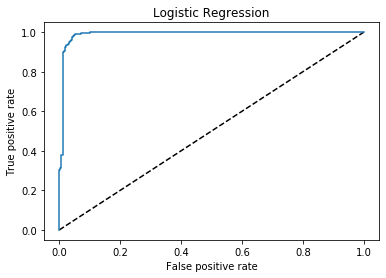

In [41]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [42]:
from sklearn.metrics import roc_auc_score


In [43]:
auc_score=roc_auc_score(test_y,lg.predict(test_x))


In [44]:
print(auc_score)

0.9579388560157791


In [45]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [46]:
rfr.score(train_x,train_y)

1.0

In [47]:
rfr=RandomForestRegressor(n_estimators=100,random_state=46)
rfr.fit(train_x,train_y)
rfr.score(train_x,train_y)

0.999998767537791

In [48]:
rfr=RandomForestRegressor(n_estimators=400,random_state=56)
rfr.fit(train_x,train_y)
rfr.score(train_x,train_y)

0.9999993953232288

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(train_x,train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
gbr=GradientBoostingRegressor(n_estimators=100,random_state=46)
gbr.fit(train_x,train_y)
gbr.score(train_x,train_y)

0.9901498519539031

In [51]:
gbr=GradientBoostingRegressor(n_estimators=500,random_state=76)
gbr.fit(train_x,train_y)
gbr.score(train_x,train_y)

0.9993772533019721